<h2 align="center">QuitBit: Employee Turnover Forecast Model</h2>

### Task 1: Import Libraries
---

In [26]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import ydata_profiling as pandas_profiling
from ydata_profiling import ProfileReport
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [27]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [28]:
hr=pd.read_csv('Dataset/Employee_Records.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [29]:
profile = ProfileReport(hr, title="Data Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 230.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

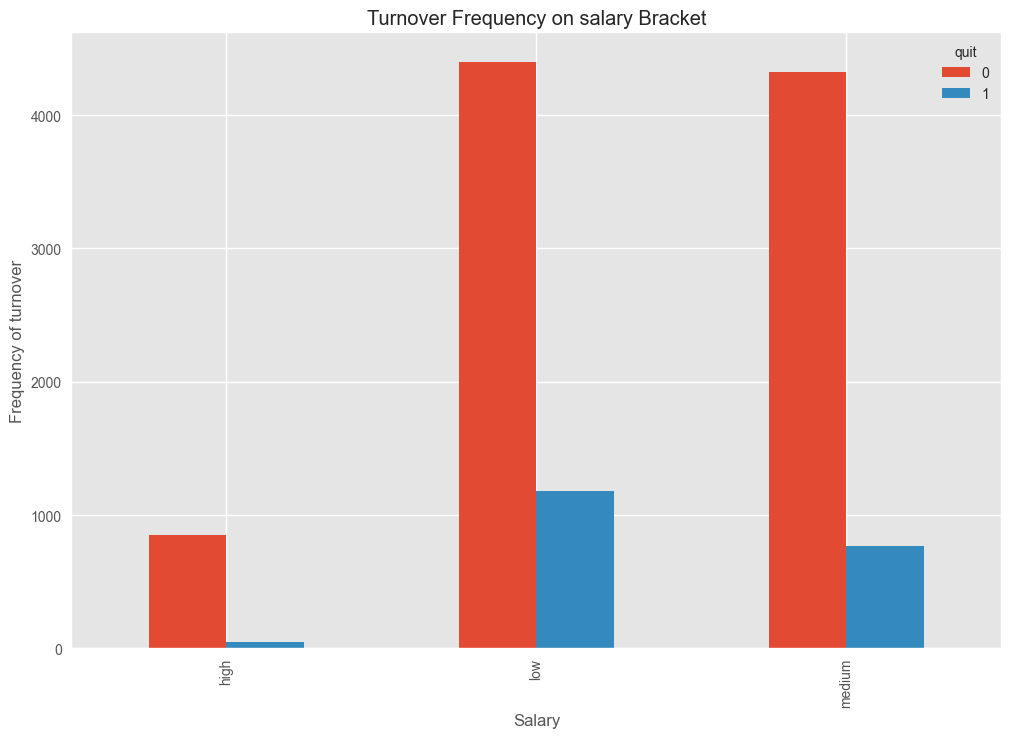

In [30]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Frequency of turnover')
plt.show()

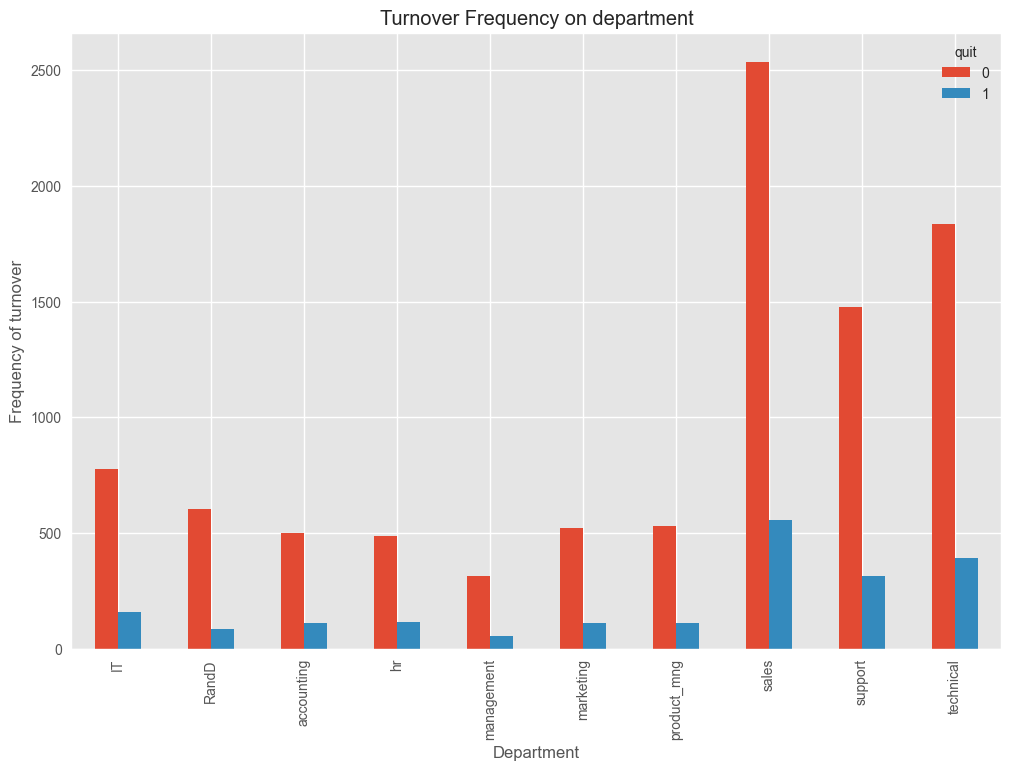

In [31]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on department")
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')
plt.show()

### Task 3: Encode Categorical Features
---

In [32]:
cat_vars=['department','salary']
for i in cat_vars:
    cat_list=pd.get_dummies(hr[i], prefix=i)
    hr=hr.join(cat_list)
    

In [33]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,...,False,False,False,False,True,False,False,False,True,False


In [34]:
hr.drop(columns=['department','salary'],axis=1,inplace=True)

### Task 4: Visualize Class Imbalance
---

In [35]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

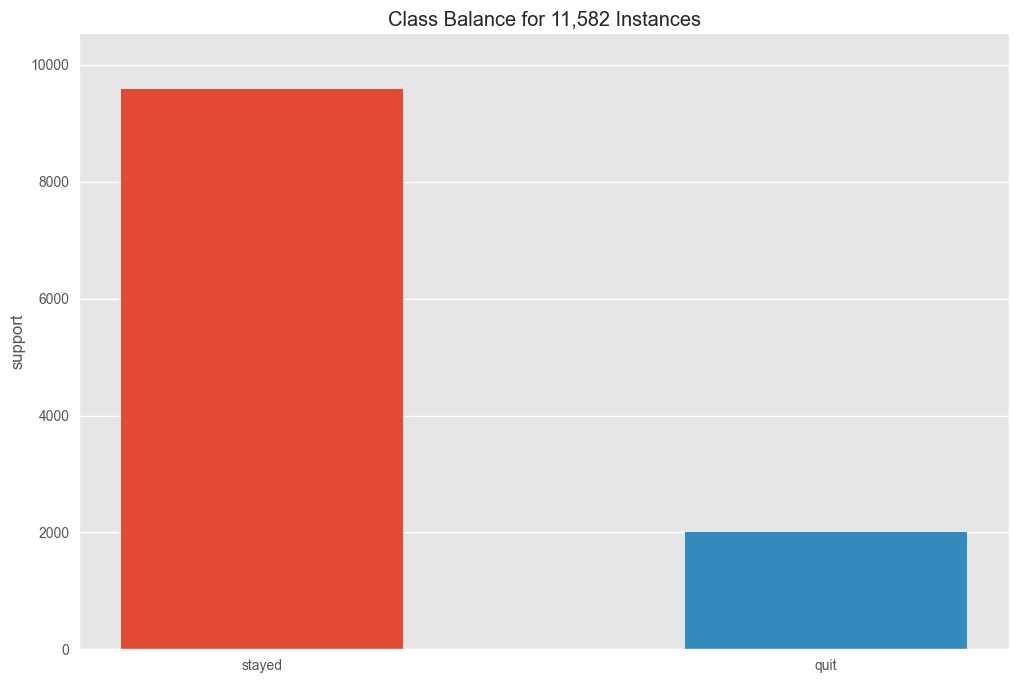

<Axes: title={'center': 'Class Balance for 11,582 Instances'}, ylabel='support'>

In [36]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [37]:
x=hr.loc[:,hr.columns !='quit']
y=hr.quit

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [40]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train,y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Decision Tree Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    graph=Source(tree.export_graphviz(estimator,out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['stayed','guit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

In [41]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=[True, False],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(x_train,y_train)
   
    print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Random Forests Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree  = estimator.estimators_[0]
    print('\visualizing Tree: ', 0)
    graph=Source(tree.export_graphviz(num_tree,
                                         out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['stayed','guit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [42]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

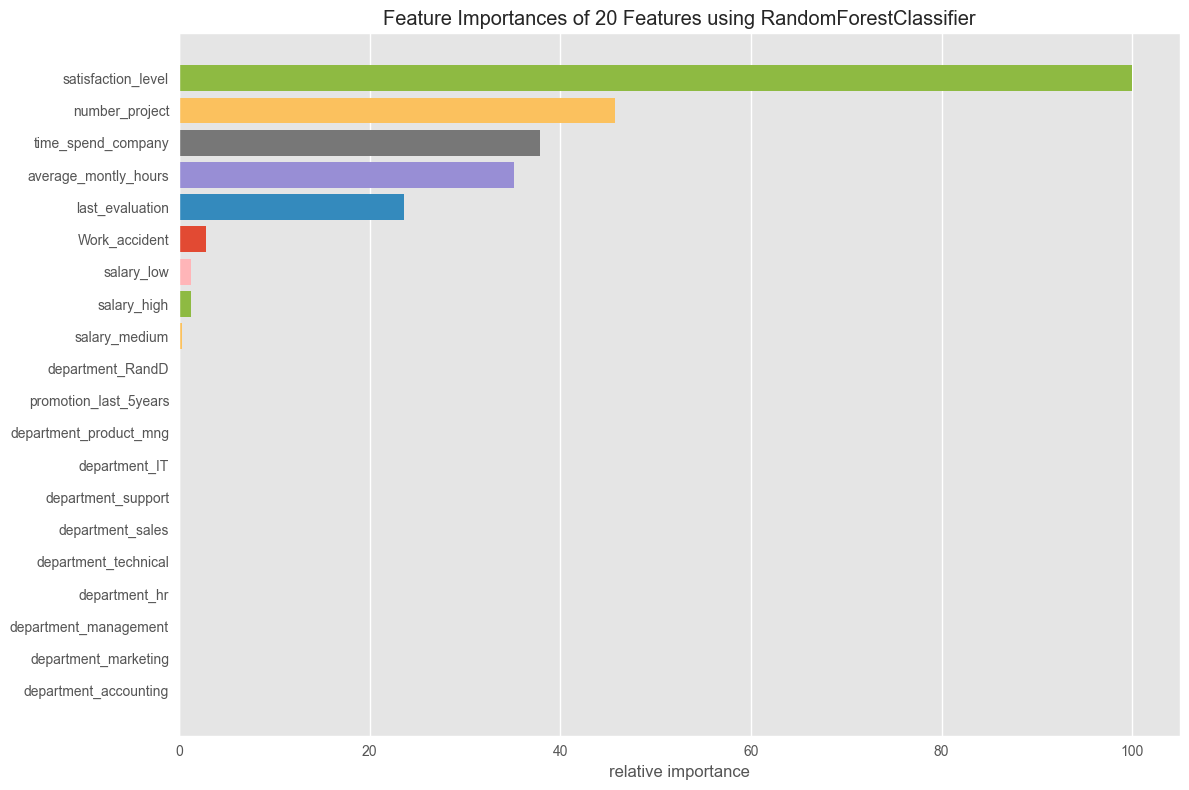

In [43]:
rf=RandomForestClassifier(
                            bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            max_depth=5, 
                            max_features='sqrt', 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0, 
                            #min_impurity_split=None,
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0, 
                            n_estimators=100, 
                            n_jobs=-1,
                            oob_score=False, 
                            random_state=1, 
                            verbose=False,
                            warm_start=False)


viz=FeatureImportances(rf)
viz.fit(x_train,y_train)
viz.show();

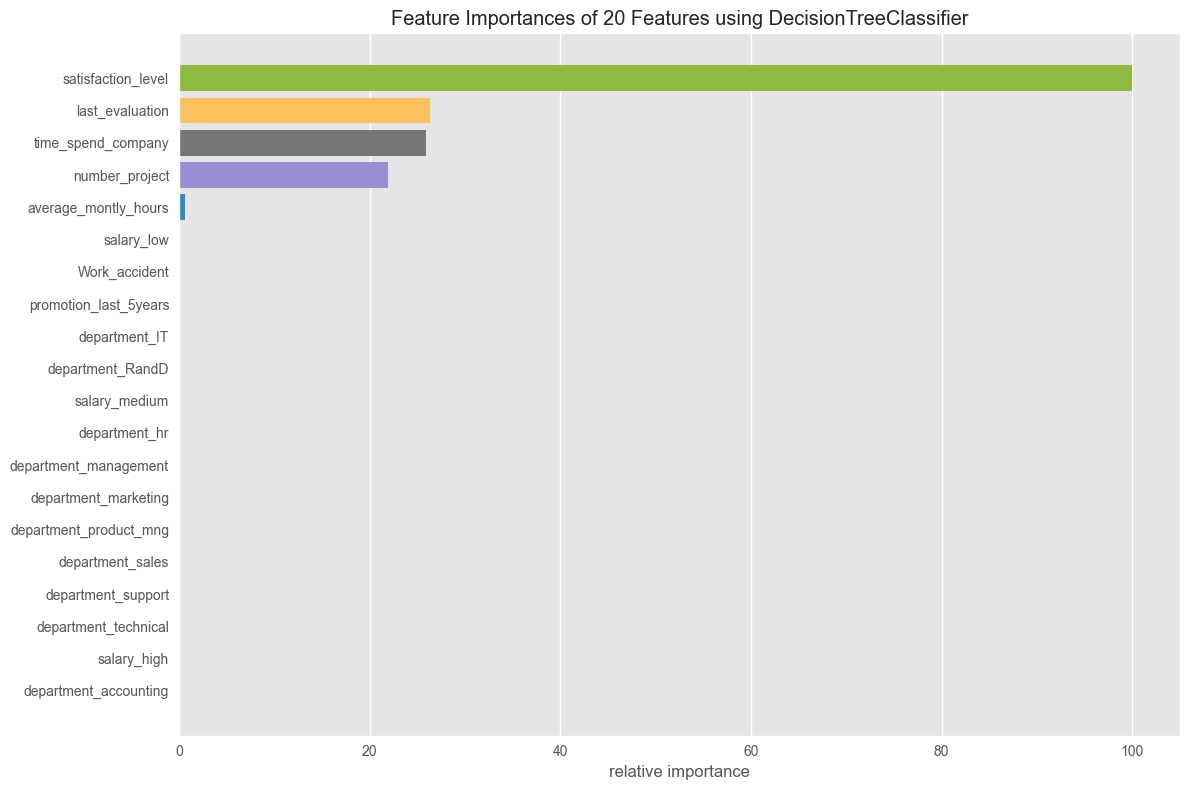

In [44]:
dt=DecisionTreeClassifier(
                            class_weight=None, 
                            criterion='gini', 
                            max_depth=3,
                            max_features=None, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0, 
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0, 
                            random_state=0,
                            splitter='best')
viz=FeatureImportances(dt)
viz.fit(x_train,y_train)
viz.show();

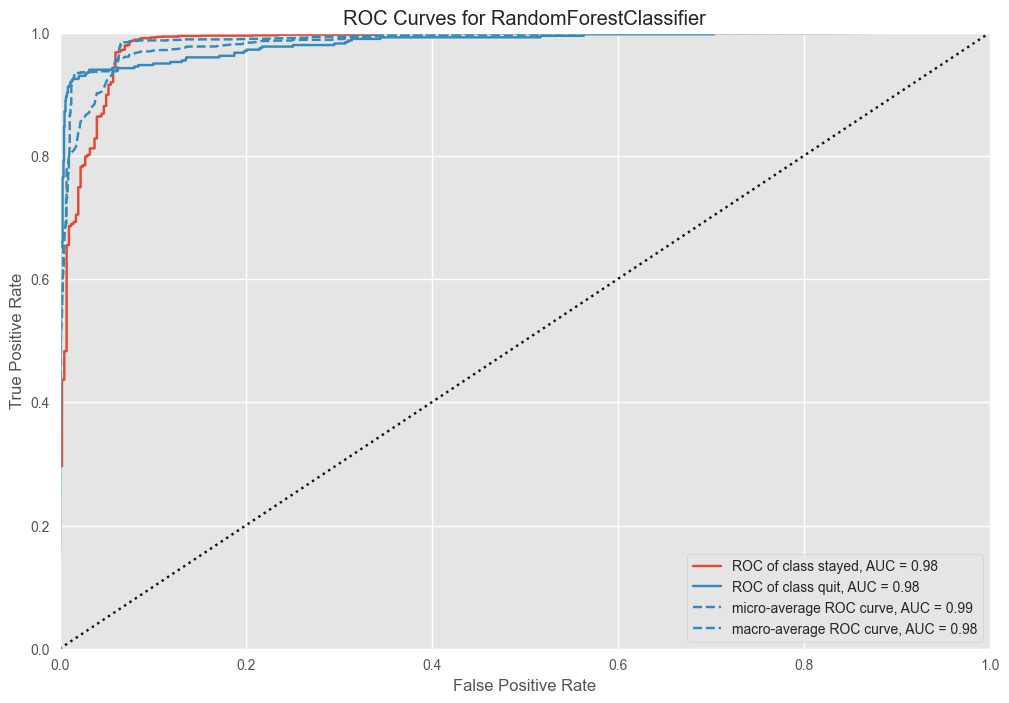

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

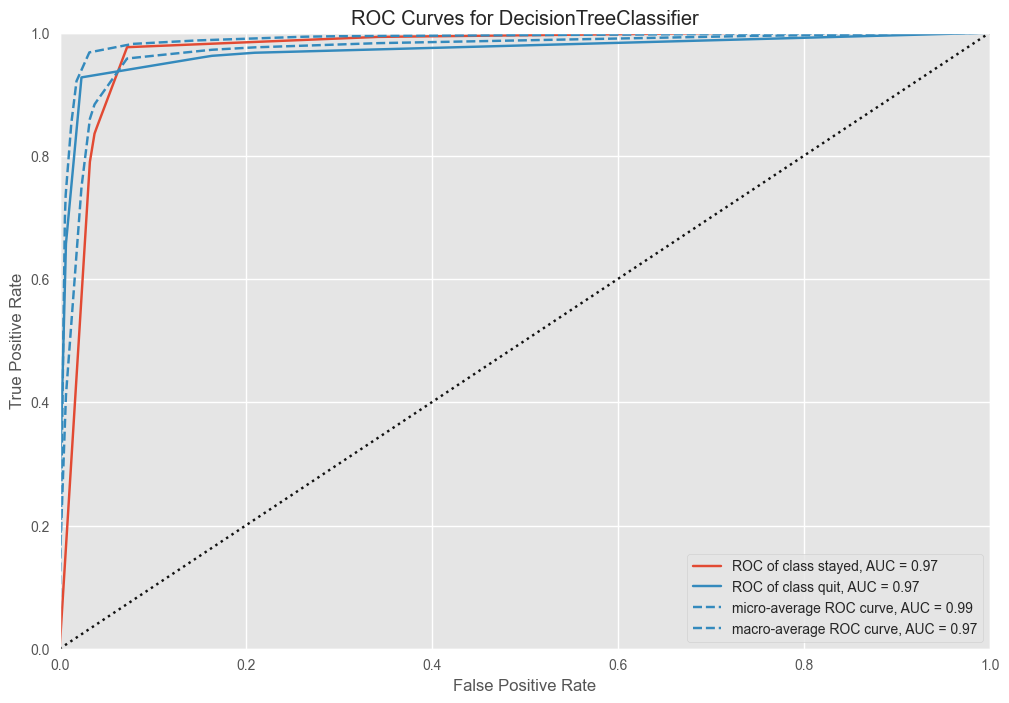

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()